In [28]:



import pandas as pd
import numpy as np

import math

import glob
import os
from os import listdir
import gzip
pd.options.display.max_columns = 100

import matplotlib.pyplot as plt
from matplotlib import pyplot

%matplotlib inline


In [5]:

df = pd.read_csv('./featured_data/df_grouped_50_30m.csv')
df = df[1:]
df.head()

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,combine_coord,total_mins_quater,holiday,holiday.1,coord_x,coord_y,count,holid
1,0.0,"(0.0, 22.0)",31.0,1,0,0.0,22.0,1.0,0.0
2,1.0,"(0.0, 22.0)",375.0,2,0,0.0,22.0,2.0,0.0
3,2.0,"(0.0, 22.0)",712.0,1,0,0.0,22.0,1.0,0.0
4,3.0,"(0.0, 22.0)",1236.0,1,0,0.0,22.0,1.0,0.0
5,4.0,"(0.0, 22.0)",2279.0,1,0,0.0,22.0,1.0,0.0


In [11]:

df_grouped = df[[ 'combine_coord', 'holid']].groupby(['combine_coord']).agg(['count']).reset_index()
print (len(df_grouped))
df_grouped['count'] = df_grouped['holid']['count']
print (df_grouped['count'].max())
df_grouped.head()



1343
3841


,combine_coord,holid,count
,,count,
0,"(0.0, 22.0)",8,8
1,"(0.0, 23.0)",21,21
2,"(1.0, 23.0)",2,2
3,"(1.0, 24.0)",2,2
4,"(10.0, 10.0)",3102,3102


In [18]:
df_new=pd.DataFrame()
#df_new.index = df_grouped.index
df_new['combine_coord'] = df_grouped['combine_coord']
df_new['count'] = df_grouped['count']
df_new.head()

,combine_coord,count
0,"(0.0, 22.0)",8
1,"(0.0, 23.0)",21
2,"(1.0, 23.0)",2
3,"(1.0, 24.0)",2
4,"(10.0, 10.0)",3102


In [21]:
df_new.sort_values(by=['count'], axis=0, ascending=False).head()

,combine_coord,count
731,"(32.0, 12.0)",3841
691,"(31.0, 14.0)",3841
733,"(32.0, 14.0)",3841
648,"(30.0, 14.0)",3841
732,"(32.0, 13.0)",3840


In [42]:
df_selected = df[(df['coord_x'] == 32)&(df['coord_y'] == 13)]
df_selected.head()

,Unnamed: 0,combine_coord,total_mins_quater,holiday,holiday.1,coord_x,coord_y,count,holid
1902683,1902682.0,"(32.0, 13.0)",0.0,11,0,32.0,13.0,11.0,0.0
1902684,1902683.0,"(32.0, 13.0)",1.0,20,0,32.0,13.0,20.0,0.0
1902685,1902684.0,"(32.0, 13.0)",2.0,12,0,32.0,13.0,12.0,0.0
1902686,1902685.0,"(32.0, 13.0)",3.0,18,0,32.0,13.0,18.0,0.0
1902687,1902686.0,"(32.0, 13.0)",4.0,19,0,32.0,13.0,19.0,0.0


In [34]:
df_selected['count'].min(), df_selected['count'].max()

(1.0, 1093.0)

In [72]:
df_selected['total_mins_quater'].min(), df_selected['total_mins_quater'].max()

(0.0, 3840.0)

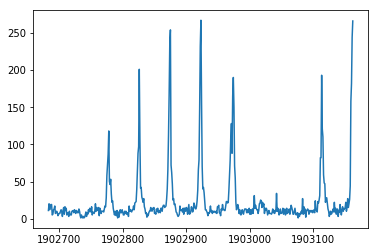

In [73]:
plt.plot(df_selected['count'][:480])

## PM 11:30 Real Demand 

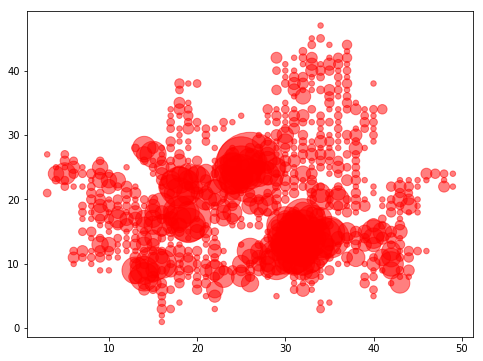

In [74]:
#colors = np.random.rand(41)

df_selected_time = df[(df['total_mins_quater'] == 95)]
df_selected_time.head()

plt.figure(figsize=(8, 6))
plt.scatter(df_selected_time['coord_x'].values, df_selected_time['coord_y'].values, 
            s=df_selected_time['count'].values*30, c='red', alpha=0.5)


## AM 06:00 Real Demand 


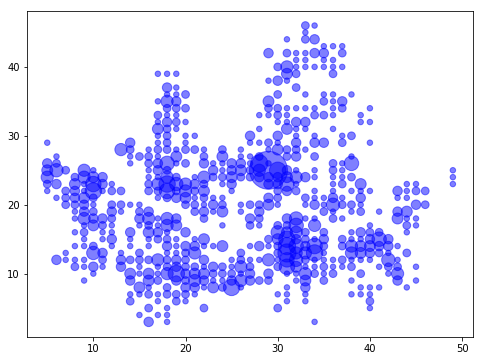

In [75]:

df_selected_time = df[(df['total_mins_quater'] == 106)]
df_selected_time.head()

#colors = np.random.rand(41)

plt.figure(figsize=(8, 6))
plt.scatter(df_selected_time['coord_x'].values, df_selected_time['coord_y'].values, 
            s=df_selected_time['count'].values*30, c='blue', alpha=0.5)

